## City Crime Prediction Using Clustering and Classification Techniques

Implement crime prediction final project for CS591-k1

In [25]:
import json
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import statsmodels.formula.api as smf
import pandas
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
import pandas as pd

import seaborn as sns
%matplotlib inline


In [32]:
import json
from pprint import pprint

with open('boston-rows.json.10000') as data_file:    
    bostonjson = json.load(data_file)

print len(bostonjson['data'])

columnlist = []
for col in bostonjson['meta']['view']['columns']:
    columnlist.append(col['name'])

    

8647


    Row format= 0:sequence number, 8:id, 10: type, 12:district, 13:area, 14:date, 15:weapon type, 19:year, 20:month, 21:day of week, 26:lat,long

In [47]:
print bostonjson['data'][0][0], bostonjson['data'][0][8], bostonjson['data'][0][10], bostonjson['data'][0][12], 
print bostonjson['data'][0][13], bostonjson['data'][0][14], bostonjson['data'][0][15], bostonjson['data'][0][19], 
print bostonjson['data'][0][20], bostonjson['data'][0][21], bostonjson['data'][0][27],

1 120420285 RESIDENTIAL BURGLARY D4 629 2012-07-08T06:00:00 Other 2012 7 Sunday [None, u'42.34638135', u'-71.10379454', None, False]


In [45]:
bostondf = pd.DataFrame(bostonjson['data'])
bostondf.columns = columnlist
print columnlist
print bostondf.head()[['INCIDENT_TYPE_DESCRIPTION','FROMDATE','Location']]

[u'sid', u'id', u'position', u'created_at', u'created_meta', u'updated_at', u'updated_meta', u'meta', u'COMPNOS', u'NatureCode', u'INCIDENT_TYPE_DESCRIPTION', u'MAIN_CRIMECODE', u'REPTDISTRICT', u'REPORTINGAREA', u'FROMDATE', u'WEAPONTYPE', u'Shooting', u'DOMESTIC', u'SHIFT', u'Year', u'Month', u'DAY_WEEK', u'UCRPART', u'X', u'Y', u'STREETNAME', u'XSTREETNAME', u'Location']
  INCIDENT_TYPE_DESCRIPTION             FROMDATE  \
0      RESIDENTIAL BURGLARY  2012-07-08T06:00:00   
1        AGGRAVATED ASSAULT  2012-07-08T06:03:00   
2                   ROBBERY  2012-07-08T06:26:00   
3       COMMERCIAL BURGLARY  2012-07-08T06:56:00   
4                   ROBBERY  2012-07-08T07:15:00   

                                         Location  
0  [None, 42.34638135, -71.10379454, None, False]  
1  [None, 42.31684135, -71.07458456, None, False]  
2  [None, 42.34284135, -71.09698955, None, False]  
3   [None, 42.3164411, -71.06582908, None, False]  
4  [None, 42.27051636, -71.11989955, None, False] 

In [54]:
print bostondf['Location'][0][1]
latlist = map(lambda k: k[1], bostondf['Location'])
longlist = map(lambda k: k[2], bostondf['Location'])

print len(latlist), len(longlist)

42.34638135
8647 8647


        lat      long
0  0.998872  0.001011
1  0.998175  0.001422
2  0.998788  0.001107
3  0.998165  0.001545
4  0.997082  0.000785


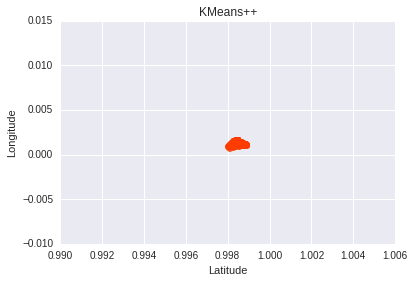

In [88]:
from sklearn import preprocessing as prep
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from scipy.cluster.vq import kmeans,vq
import collections

warnings.filterwarnings("ignore")        

vector = CountVectorizer(min_df=1)
typevec = vector.fit_transform(bostondf['INCIDENT_TYPE_DESCRIPTION'])
#print typevec

crimetypedf = pd.DataFrame({'lat':latlist, 'long':longlist})
crimetypedf[['lat','long']] = crimetypedf[['lat','long']].apply(lambda k: prep.MinMaxScaler().fit_transform(k))

print crimetypedf.head()
crimetypematrix = crimetypedf.as_matrix()
kmeans=KMeans(init='k-means++',n_clusters=8, n_init=10)
kmeans.fit_predict(crimetypematrix)
centroids = kmeans.cluster_centers_

crimevq = vq(crimetypematrix, centroids)[0]
bostonclusters = [[] for i in range(len(crimevq))]

for item, clustN in zip(crimetypematrix, crimevq):
    #store the cluster for categ/attr and cluster number
    bostonclusters[clustN].append(item)

#cl = bostonclusters[0]
#legends=plt.scatter([item[0] for item in cl],[item[1] for item in cl],marker='o', color=(1,random.uniform(0.2,0.5), 0.0), alpha=0.6)
            
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.title("KMeans++")
plt.show()